# 2 Statistical Learning

## 2.1 What Is Statistical Learning?

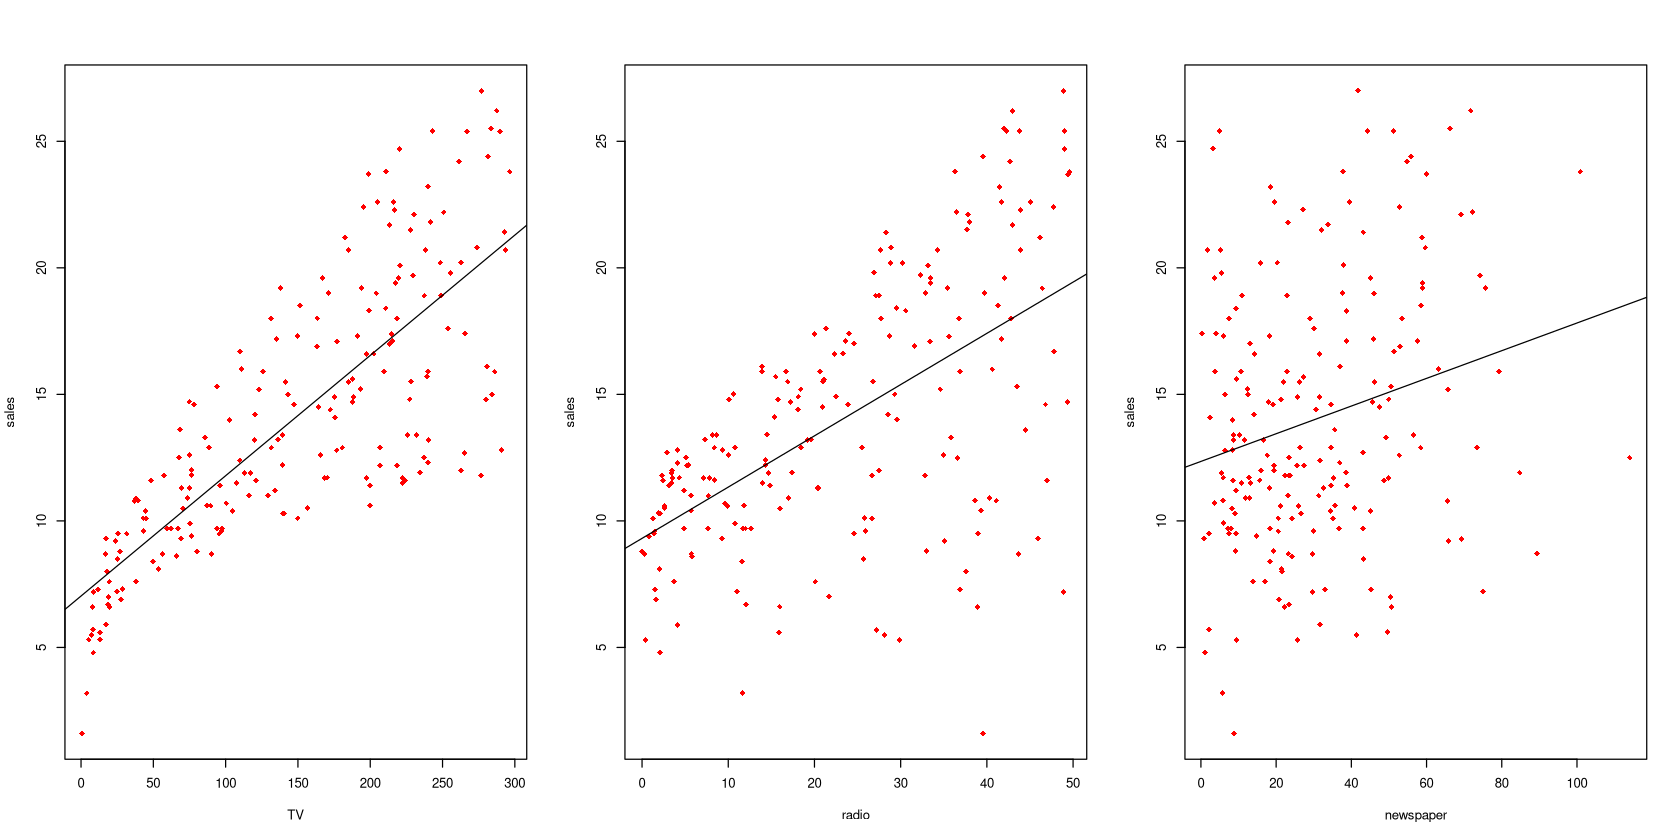

In [1]:
Advertising <- subset(read.csv("../99DataSets/Advertising.csv"),select = -X)
attach(Advertising)
par(mfrow = c(1, 3))
options(repr.plot.width=14, repr.plot.height=7)
plot(TV,sales, col="red", pch=18)
abline(lm(sales ~ TV, data = Advertising))
plot(radio, sales, col="red", pch=18)
abline(lm(sales ~ radio, data = Advertising))
plot(newspaper, sales, col="red", pch=18)
abline(lm(sales ~ newspaper, data = Advertising))
rm(list=ls())

__FIGURE 2.1__ The `Advertising` data set. The plot displays `sales`, in thousands of units, as a function of `TV`, `radio`, and `newspaper` budgets, in thousands of dollars, for 200 different markets. In each plot we show the simple least squares fit of `sales` to that variable, as described in Chapter 3. In other words, each blue line represents a simple model that can be used to predict `sales` using `TV`, `radio`, and newspaper`, respectively.

---

A set of methods to find the form of $f$ that will accurately predict a quantitative response $Y$ from a set of predictors $X=X_1,X_2,\ldots,X_p$. The general form can be written as
\begin{align}\tag{2.1}
Y = f(X) + \epsilon
\end{align}

$f$ is some fixed but unkown function of $X_1,\ldots,X_p$.  
$\epsilon$ is a random _error term_.  
$Y$ is the quantitative response value we are trying to predict.

---

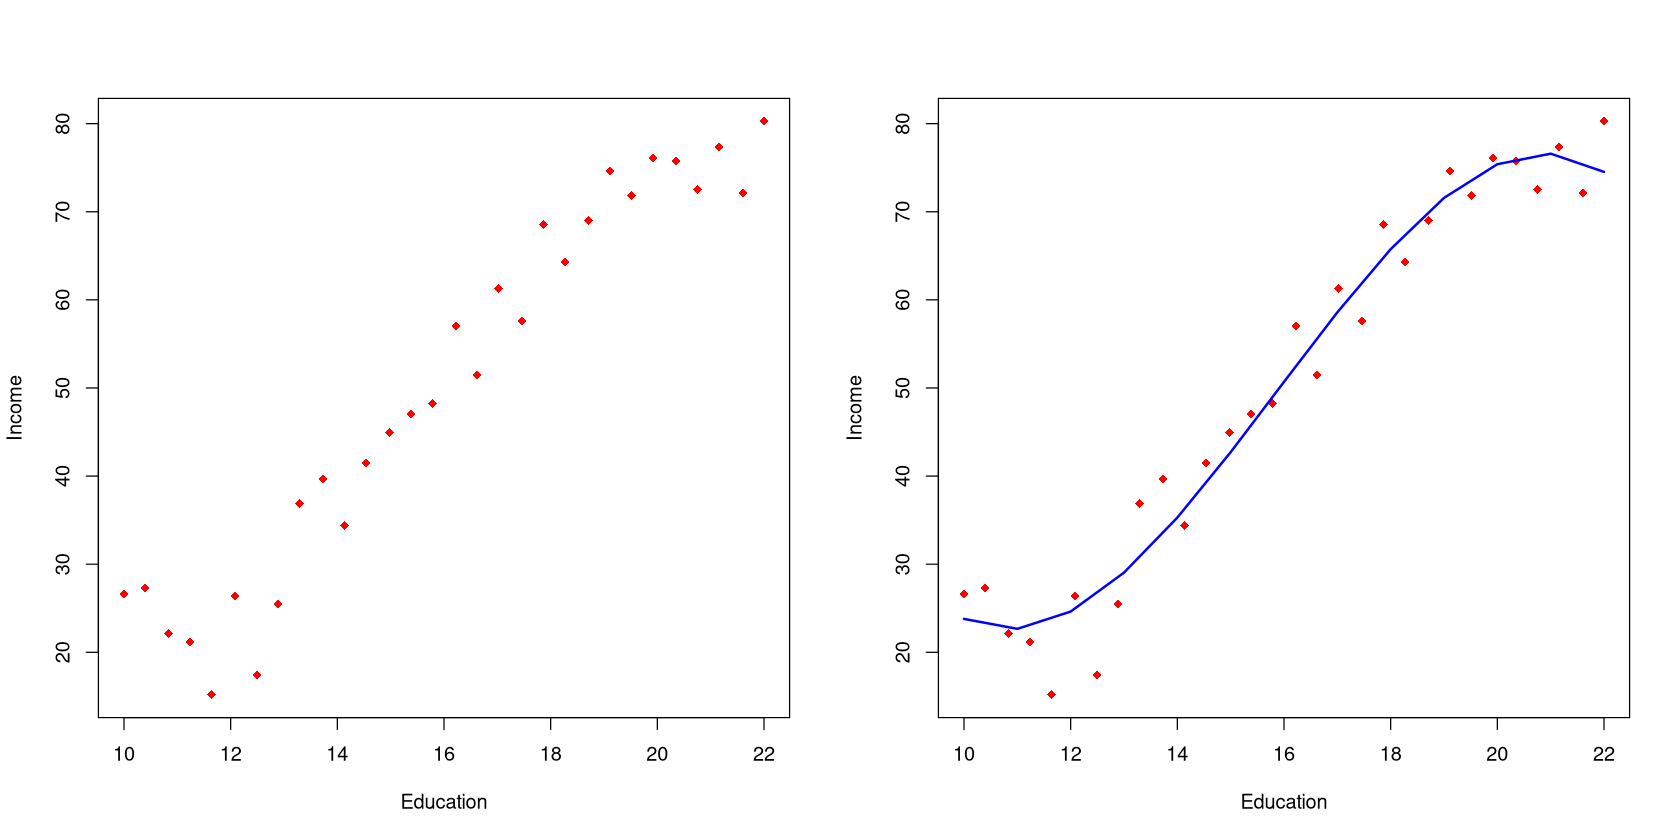

In [2]:
Income.1 <- subset(read.csv("../99DataSets/Income1.csv"), select = -X)
attach(Income.1)
fit <- lm(Income ~ poly (Education, 3), data = Income.1)
Edu <- range(Education)
Education.grid <- seq(from = Edu[1], to = Edu[2])
preds <- predict(fit, newdata = list(Education = Education.grid), se = T)
par(mfrow = c(1, 2))
options(repr.plot.width=14, repr.plot.height=7)
plot(Income.1, col="red", pch=18)
plot(Income.1, col="red", pch=18)
lines(Education.grid, preds$fit, lwd = 2, col = "blue")
rm(list=ls())
options(repr.plot.width=7, repr.plot.height=7)


__FIGURE 2.2__ The `Income` data set. Left: The red dots are the observed values of `income` (in tens of thousands of dollars) and `years of education` for 30 individuals. Right: The blue curve represents the true underlying relationship between `income` and `years of education`, which is generally unkown (but is known in this case because the data were simulated). The black lines represent the error associated with each observation. Note that some errors are positive (if an observation lies above the blue curve) and some are negative (if an observation lies below the curve). Overall, these errors have approximately mean zero.

### 2.1.1 Why Estimate $f$ ?

#### Prediction

Estimating the response $Y$ for a given set of predictors $X$.
\begin{align}\tag{2.2}
\hat{Y} = \hat{f}(X)
\end{align}
where $\hat{f}$ represents the estimate for $f$, and $\hat{Y}$ represents the prediction for $Y$.  

The accuracy of $\hat{Y}$ depends on two quantities: the _reducible error_ and the _irreducible error_.
\begin{align}\tag{2.3}
E(Y - \hat{Y})^2 &= E \left[ f(x) + \epsilon - \hat{f}(X) \right]^2 \\
                 &= \underbrace{ \left[ f(X) - \hat{f}(X) \right]^2 }_{\text{Reducible}} +
                    \underbrace{ \text{Var}(\epsilon) }_{\text{Irreducible}}
\end{align}
The _reducible error_ is the focus of minimization with statistical learning methods. The _irreducible error_ cannot be reduced or eliminated and thus provides an upper bound on the accuracy of the prediction for $Y$.  

$E(Y - \hat{Y})^2$ represents the average, or _expected value_, of the squared difference between the predicted and actual value of $Y$.  
$\text{Var}(\epsilon)$ represents the _variance_ associated with the error term $\epsilon$.

#### Inference

Understanding the relationship between the response $Y$ and the set of predictors $X=X_1,\ldots,X_p$. These relationships can be used to answer genral questions such as:
* Which predictors are associated with the response?
* What is the relationship between the response and each predictor?
* Can the relationship between $Y$ and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?

### 2.1.2 How Do We Estimate $f$ ?

#### Parametric Methods

1. We make an assumption of the form or shape of $f$. For example, an assumption can be that $f$ is linear in $X$:
\begin{align}\tag{2.4}
f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p\text{.}
\end{align}
2. After the model has been selected, we need a procedure that uses the training data to _fit_ or _train_ the model. This means estimating the parameters $\beta_0, \beta_1, \ldots, \beta_p$.
\begin{align}
Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p\text{.}
\end{align}
The most common approach to fitting the model (2.4) is referred to as _(ordinary) least squares_.

This model-based approach is referred to as _parametric_; it reduces the problem of estimating $f$ down to one of estimating a set of paramters. The model that we choose will usually not match the true unkown form of $f$. It is just an estimate. If we choose a model that is too far from the true $f$, then our estimate will be poor.  

Fitting a more flexible model  requires estimating a greater number of parameters and has the danger of _overfitting_ the data. When this occurs, the model will follow the rrors, or _noise_, too closely.

#### Non-Parametric Methods

Non-parametric methods do not make explicit assumptions about the functional form of $f$. By avoiding the assumption of a particular form of $f$, the method has the potential to accurately fit a wider range of possible shapes for $f$.  

A major issue with non-parametric methods is that, because they do not reduce the problem of estimating $f$ to a small number of parameters, a very large number of observations are needed to obtain an accurate estimate for $f$.

### 2.1.3 The Trade-Off Between Prediction Accuracy and Model Interpretability

As the statistical methods for estimating $f$ become more flexible, they are able to fit the data more accurately. Below is a list of statistical learning methods from the least flexible to the most flexible:
1. Subset Selection Lasso
2. Least Squares
3. Generalized Addititive models
4. Trees
5. Bagging, Boosting
6. Support Vector Machines
7. Deep Learning

From Subset Selection Lasso to Deep Learning, the models become more flexible and represent the data much more accurately. However, as the statisitcal learning methods become more flexible they also become less interpretable. This means it becomes harder to understand how the model came to the conclusions that it did.  

If your goal is to more accurately generate predictions, then the model's interpretability is less important and a more flexible model becomes valuable.  

When working with data it is sometimes important to understand the data and how that data is generated from its population. This becomes important if you want to know if the data is a valid representation of its population. If _statistical inference_ is more important than _prediction_, then the model's interpretability becomes more important.

__Other References__
- Döring, M. _Inference vs Prediction_. (2018, December 7). Data Science Blog: Understand. Implement. Succed. https://www.datascienceblog.net/post/commentary/inference-vs-prediction/
- Frost, J. (2023, February 7). _Statistical inference: definition, methods & example_. Statistics by Jim. https://statisticsbyjim.com/hypothesis-testing/statistical-inference/

### 2.1.4 Supervised Versus Unsupervised Learning

Supervised learning has a response for the predictor measurements. In this case, we want to fit a model that relates the response to these predictors in order to accurately predict the response or to better understand the predictors relationship with the response. Statistical learning methods that operate as supervised methods include: linear regression, logistic regression, GAM, boosting, and support vector machines.

Unspervised learning has no response and therefore we are more interested in understanding the relationships between variables or between observations. A statistical learning method that operates in the unsupervised domain is cluster analysis or clustering. Clustering is used to determine how the observations group together using relationships between the variables. This is useful in market sementation studies.

### 2.1.5 Regression Versus Classification Problems

Variables can be described as either _quantitative_ or _qualitative_ (or _categorical_). Quantitative variables are numerical values. Qualitative variables take on values that are of classes or categories. Most of the time a numerical value makes no sense with qualitative variables. Problems that are quantitative in their response are usually called regression problems, and problems that have a qualitative response are usually called classification problems. However, it is not always easy to classify this way. For instance, linear regression is a regression statistical learning method, but logistic regression is a classification statistical learning method. Some methods, such as K-nearest neighbors and boosting, can be used with either quantitative or qualitative responses.

## 2.2 Assessing Model Accuracy

### 2.2.1 Measuring the Quality of Fit

The most commonly-used measure of how close the predicted response value for a given observation is to the true response value of that observation is called the _mean squared error_ (MSE)
\begin{align}\tag{2.5}
\text{MSE} = \frac{1}{n} \sum^n_{i=1}{ (y_i - \hat{f}(x_i))^2 }\text{,}
\end{align}

$\hat{f}(x_i)$ is the prediction that $\hat{f}$ gives for the _i_ th observation.  
The MSE will be small if the predicted responses  are very close to the true responses, and will be large if for some of the observations, the predicted and true responses differ substantially.  

The MSE in (2.5) is used to compute the _training MSE_. However, we are usually not interested in how well the method works on _training data_. We are mostly interested on how well the method works on previously unseen data called the _test data_.  

We want to know whether $\hat{f}(x_0)$ is approximately equal to $y_0$. Where $(x_0, y_0)$ is a previously unseen test observation not used to train the statisical learning method. We want to choose the method that gives the lowest _test MSE_, as opposed to the lowest training MSE. If we have a large number of test observations, we could compute
\begin{align}\tag{2.6}
\text{Ave}(y_0 - \hat{f}(x_0))^2\text{,}
\end{align}
the average squared prediction error for these test observations $(x_0, y_0)$. We'd like to select the model for which this quantity is as small as possible.

In some settings we have a test data set available. This is a data set that is independent from the training data set. We can evaluate (2.6) on the test observations, and select the learning method for which the test MSE is smallest. It is useless to use the training data set to evaluate the model because the statistical method used to create the model specifically estimate coefficients that minimize the $\mathrm{MSE}$.

Loading required package: splines



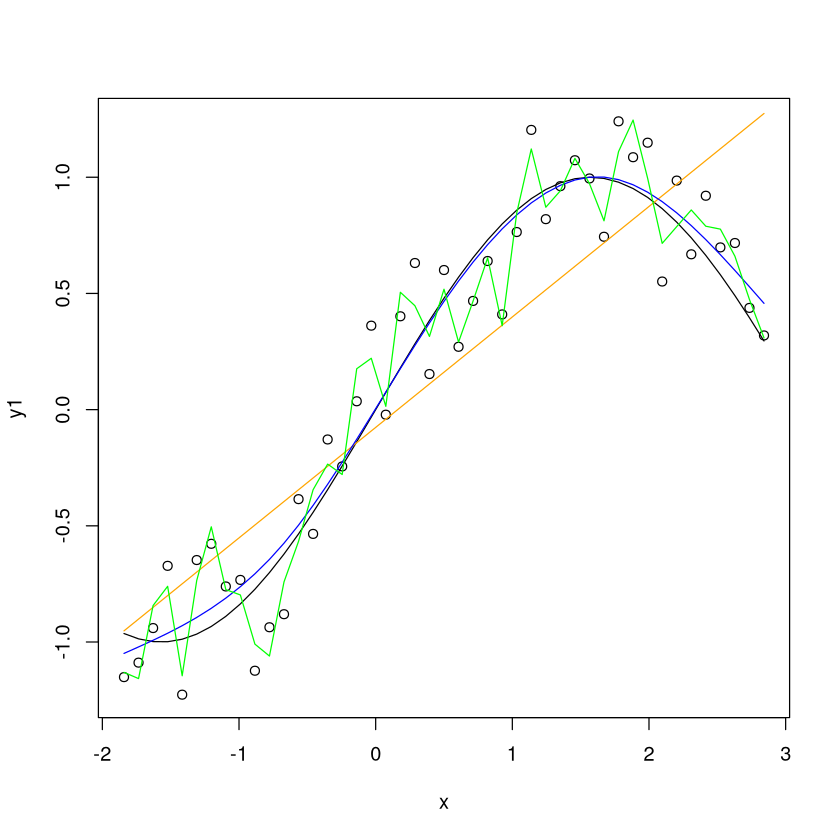

In [3]:
require(splines)
n <- 45
xlim <- c((-pi+1.3),(pi-.3))
x <- seq(xlim[1],xlim[2], length.out=n)

set.seed(1)
y1 <- jitter(sin(x),amount=.4)
lm.fit <- lm(y1 ~ x)
ns4.fit <- lm(y1 ~ ns(x, df = 4))
ns8.fit <- lm(y1 ~ ns(x, df = 32))
lm.pred <- predict(lm.fit, newdata = list(X = x), se = T)
ns4.pred <- predict(ns4.fit, newdata = list(X = x), se = T)
ns8.pred <- predict(ns8.fit, newdata = list(X = x), se = T)

plot(x,y1)
lines(x,sin(x))
lines(x, lm.pred$fit, col="orange")
lines(x, ns4.pred$fit, col="blue")
lines(x, ns8.pred$fit, col="green")
rm(list=ls())

__TODO__  
__FIGURE 2.9__. Left: Data simulated from $f$, shown in black. Three estimates of $f$ are shown: the linear regression line (orange curve), and two smoothing spline fits (blue and green curves). Right: Training MSE (grey curve), test MSE (red curve), and minimum possible test MSE over all methods (dashed line). Squares represent the training and test MSEs for the three fits shown in the left-hand panel.

In the left panel of Figure 2.9 is generated sample observations from (2.1) with the true $f$ in black. The orange, blue and green curves represent estimates of $f$ at various levels of flexibility. The orange line is the linear regression fit, which is relatively inflexible. The blue and green curves use smoothing splines, with different levels of smoothness. As the flexibility increases it can be seen that the curves fit the observed data more closely. The green curve is the most flexible and matches the data very well. What this figure demonstrates is that we can produce different model fits to the data by adjusting the flexibility.

The right-hand panel of Figure 2.9 shows the MSE of both training and testing as a function of the model flexibility. More formally, flexibility is called the _degrees of freedom_, for a number of smoothing splines. The degrees of freedom is a quantity that summarizes the flexibility of a curve. A more restrictive, smoother curve has fewer degrees of freedom. In Figure 2.9, the linear regression is the most restrictive, with two degrees of freedom. The training MSE declines monotonically as flexibilty increases. The linear regression fit is not flexible enought to estimate $f$ well since $f$ is not linear. The green curve has the lowest training MSE of all three methods and is the most flexible of the three fits. Because we know the true value of $f$ we can use that to compute the test MSE. Although the linear model still has the highest MSE value of the three, the green curve is no longer the lowest. The test MSE curve has a U-_shape_. This is because as the flexibility increases, the model may begin to overfit to the training data. This is because, as the flexibility increases, the statistical learning method begins to pick up patterns in the training data that are caused by random chance, rather than the true nature of of the function $f$. Overfitting refers specifically to the case in which a less flexible model would have yielded a smaller test MSE.

In practice we use _cross-validation_ to estimate the test MSE using training data.

### 2.2.2 The Bias-Variance Trade-Off

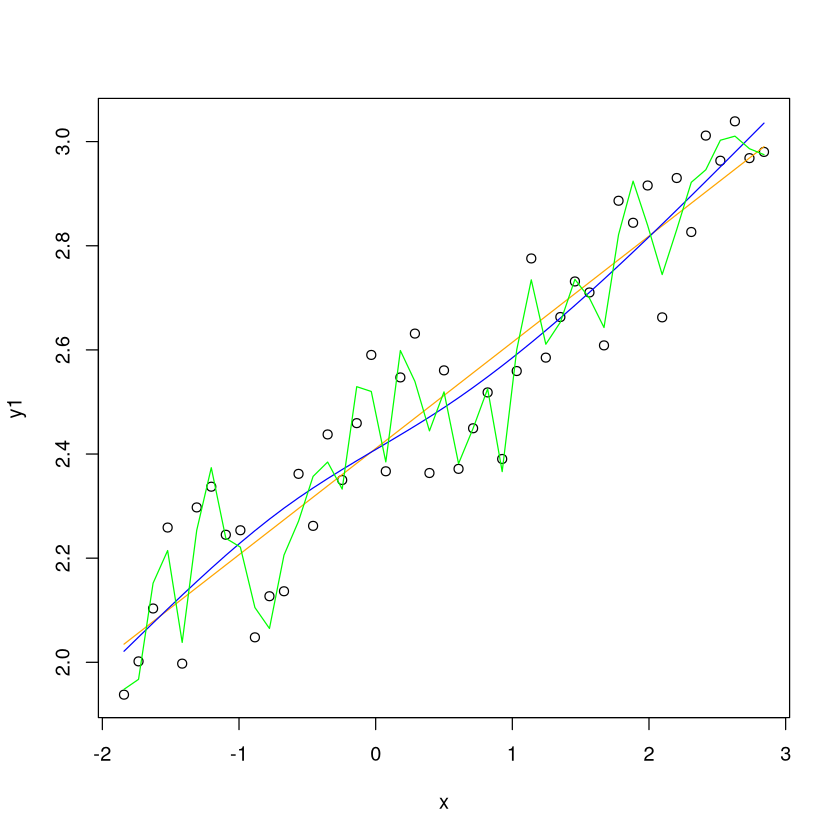

In [4]:
require(splines)
n <- 45
xlim <- c((-pi+1.3),(pi-.3))
x <- seq(xlim[1],xlim[2], length.out=n)

set.seed(1)
y1 <- jitter(2.4 + x/5,amount=.2)
lm.fit <- lm(y1 ~ x)
ns4.fit <- lm(y1 ~ ns(x, df = 4))
ns8.fit <- lm(y1 ~ ns(x, df = 32))
lm.pred <- predict(lm.fit, newdata = list(X = x), se = T)
ns4.pred <- predict(ns4.fit, newdata = list(X = x), se = T)
ns8.pred <- predict(ns8.fit, newdata = list(X = x), se = T)

plot(x,y1)
lines(x,sin(x))
lines(x, lm.pred$fit, col="orange")
lines(x, ns4.pred$fit, col="blue")
lines(x, ns8.pred$fit, col="green")
rm(list=ls())

__TODO__  
__FIGURE 2.10__. Details are as in Figure 2.9, using a different true $f$ that is much closer to linear. In this setting, linear regression provides a very good fit to the data.

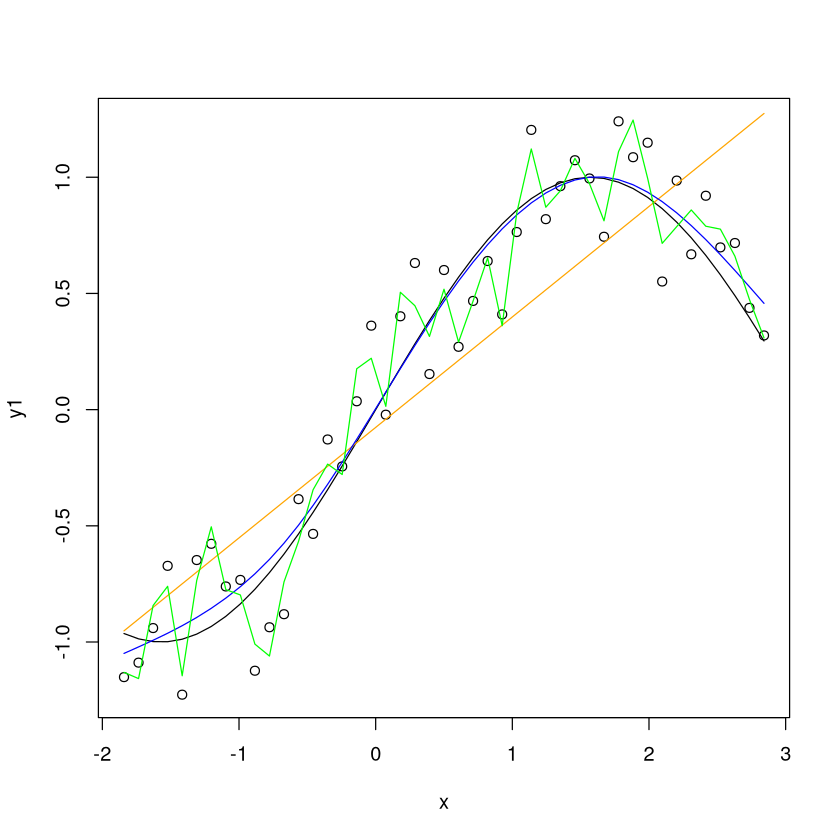

In [5]:
require(splines)
n <- 45
xlim <- c((-pi+1.3),(pi-.3))
x <- seq(xlim[1],xlim[2], length.out=n)

set.seed(1)
y1 <- jitter(sin(x),amount=.4)
lm.fit <- lm(y1 ~ x)
ns4.fit <- lm(y1 ~ ns(x, df = 4))
ns8.fit <- lm(y1 ~ ns(x, df = 32))
lm.pred <- predict(lm.fit, newdata = list(X = x), se = T)
ns4.pred <- predict(ns4.fit, newdata = list(X = x), se = T)
ns8.pred <- predict(ns8.fit, newdata = list(X = x), se = T)

plot(x,y1)
lines(x,sin(x))
lines(x, lm.pred$fit, col="orange")
lines(x, ns4.pred$fit, col="blue")
lines(x, ns8.pred$fit, col="green")
rm(list=ls())

__TODO__  
__FIGURE 2.11__. Details are as in Figure 2.9, using adifferent $f$ that is far from linear. In this setting, linear regression provides a very poor fit to the data.

The U-shape observed in the test MSE curves is the result of two competing properties of statistical learning methods. It can mathematically proven that the expected test MSE, for a given value $x_0$, can always be decomposed into the sum of three fundamental quantities: the _variance_ of $\hat{f}(x_0)$, the squared _bias_ of $\hat{f}(x_0)$ and the variance of the error terms $\epsilon$. That is,
\begin{align}\tag{2.7}
E\left(y_0 - \hat{f}(x_0)\right)^2 = \mathrm{Var}(\hat{f}(x_0)) + \left[\mathrm{Bias}(\hat{f}(x_0))\right]^2 + \mathrm{Var}(\epsilon)\mathrm{.}
\end{align}
Here the notation $E\left(y_0 - \hat{f}(x_0)\right)^2$ defines the _expected test MSE at $x_0$_, and refers to the average test MSE that we would obtain if we repeatedly estimated $f$ using a large number of training sets, and tested each at $x_0$. The overall expected test MSE can be computed by averaging $E\left(y_0 - \hat{f}(x_0)\right)^2$ over all possible values of $x_0$ in the test set.

Equation 2.7 says that in order to minimize the test MSE, we need to minimize both the _variance_ and the _bias_. Variance is inherently nonnegative and bias squared is also nonnegative. This means that the value of the test MSE can never be below the irreducible error $\mathrm{Var}(\epsilon)$ of equation (2.3).

_Variance_ refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set. Ideally, the estimate for f ($\hat{f}$) should not vary too much between training sets. However, if a method has high variance then small changes in the training data can result in large changes in $\hat{f}$. In general, more flexible statistical methods have a higher variance.

_Bias_ refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model. As an example, most real-life problems will rarely have a linear relationship and so performing linear regression will result in bias. Generally, more flexible methods result in less bias.

As a general rule, as we use more flexible methods, the variance will increase and the bias will decrease. The relative rates of change of these two quantities determines whether the test MSE increases or decreases. At some point, increasing flexibility has little impact on bias but starts to significantly increase variance. When this happens the test MSE increases. This pattern can be viewed in the right panel of Figures 2.9&ndash;2.11.

__TODO__  
__FIGURE 2.12__. Squared bias (blue curve), variance (orange curve), Var($\epsilon$) (dashed line), and test MSE (red curve) for the three data sets in Figure 2.9&ndash;2.11. The vertical dotted line indicates the flexibility level corresponding to the smallest test MSE.

The relationship between bias, variance, and test set MSE is given by Equation (2.7) and displayed in Figure 2.12. This is called the _bias-variance trade-off_. This is a trade-off because it is easy to obtain a method with extremely low bias but high variance, or vice-versa. The challenge is to find a method for which both the variance and the squared bias are low.

### 2.2.3 The Classification Setting

Many of the concepts discussed about regression can transfer over to classification with little modifications. Classification sets to estimate $f$ on teh basis of training observations $\{(x_1,y_1),\ldots,(x_n,y_n)\}$, where the response $y_1,\ldots,y_n$, are qualitative. The most common approach for quantifying the accuracy of our estimate $\hat{f}$ is the training _error rate_, the proportion of mistakes that are made if we apply our estimate $\hat{f}$ to the training observations
\begin{align}\tag{2.8}
\frac{1}{n} \sum^n_{i=1}{I(y_i \ne \hat{y}_i)}\mathrm{.}
\end{align}
$\hat{y}_i$ is the predicted class label for the $i$th observation using $\hat{f}$.  
$I(y_i \ne \hat{y}_i)$ is an _indicator variable_ that equals $1$ if $y_i \ne \hat{y}_i$ and $0$ if $y_i = \hat{y}_i$.

If the indicator variable is $0$ then the $i$th observation was classified correctly. Otherwise it was misclassified. Equation (2.8) computes the fraction of incorrect classifications. Equation (2.8) is the _training error_ rate because it is computed based on the data that was used to train our classifier.

Like regression problems, we are mostly interested in _test error_ rates and this is calculated as
\begin{align}\tag{2.9}
\mathrm{Ave}(I(y_0 \ne \hat{y}_0))
\end{align}
where $\hat{y}_0$ is the predicted class label that results from applying the classifier to the test observation with predictor $x_0$. A _good_ classifier is one for which the test error (2.9) is smallest.

#### The Bayes Classifier

The test error rate given in (2.9) is minimized, on average, by a classifier that assigns each observation to the most likely class, given its predictor values. In other words, we should simply assign a test observation with predictor vector $x_0$ to the class $j$ for which
\begin{align}\tag{2.10}
\Pr(Y=j|X=x_0)
\end{align}
is largest.

(2.10) is a conditional probabiliyt: it is the probability that $Y=j$, given the observed predictor vector $x_0$. This very simple classifier is called the _Bayes classifier_.

In a two-class problem where there are only two possible response values, the Bayes classifier corresponds to predicting class one if $\mathrm{Pr}(Y=1|X=x_0) > 0.5$, and class two otherwise.

__TODO__  
__FIGURES 2.13__. A simulated data set consisting of 100 observations in each of two groups,k indicated in blue and in orange. The purple dashed line represents the Bayes decision boundary. The orange background grid indicates the region in which a test observation will be assigned to the orange class, and the blue background grid indicates the region in which a test observation will be assigned to the blue class.

The boundary line where the probability of class is exactly $50\%$ is called the _Bayes decision boundary_. The Bayes classifier's prediction is determined by the Bayes decision boundary; an observation will fall on one side or the other.

The Bayes classifier produces the lowest possible test error rate, called the _Bayes error rate_. Since the Bayes classifier will always choose the class for which (2.10) is largest, the error rate will be $1-\mathrm{max}_j \mathrm{Pr}(Y=j|X=x_0)$ at $X=x_0$. In general, overall Bayes error rate is given by
\begin{align}\tag{2.11}
1 - E\left(\max_j \Pr(Y=j|X)\right)\mathrm{,}
\end{align}
where the expectation averages the probability over all possible values of $X$. For our simulated data, the Bayes error rate is $0.133$. It is greater than zero, because the classes overlap in the true population so $\max_j\Pr(Y=j|X=x_0)<1$ for some values of $x_0$. The Bayes error rate is analogous to the irreducible error, discussed earlier.

#### K-Nearest Neighbors

Given a positive integer $K$ and a test observation $x_0$, the KNN classifier first identifies the K points in the training data that are closest to $x_0$, represented by $\cal{N}_0$. It then estimates the conditional probability for class $j$ as the fraction of points in $\cal{N}_0$ whose response values equal $j$:

\begin{align}\tag{2.12}
\Pr(Y=j|X=x_0) = \frac{1}{K} \sum_{i \in \cal{N}_0} {I(y_i=j)}\mathrm{.}
\end{align}

__TODO__  
__FIGURE 2.14__. The KNN apprach, using $K=3$, is illustrated in a simple situation with six blue observations and siz orange observations. Left: a test observation at which a predicted class label is desired is shown as a black cross. The three closest points to the test observation are identified, and it is predicted that the test observation belongs to the most commonly-occurring class, in this case blue. Right: THe KNN decision boundary for this example is shown in black. The blue grid indicates the region in which a test observation will be assigned to the blue class, and the orange grid indicates the region in which it will be assigned to the orange class.

__TODO__  
__FIGURE 2.15__. The black curve indicates the KNN decision boundary on the data from figure 2.13, using K=10. The Bayes decision boundary is shown as a purple dashed line. THe KNN and Bayes decision boundaries are very similar.

__TODO__  
__FIGURE 2.16__. A comparison of the KNN decision boundaries (solid black curves) obtained using $K=1$ and $K=100$ on athe data from Figure 2.13. With $K=1$, the decision boundary is overly flexible, while with $K=100$ it is not sufficiently flexible. The Bayes decision boundary is shown as a purple dashed line.